# CUNY MSDS DATA618 - Quantative Finance

## Week 4 : Brain Stumper 

### Deepak Sharma
---------------------
The following Investopedia post (https://www.investopedia.com/ask/answers/06/oilpricesinflation.asp) posits a reduced influence of oil prices on inflation today compared to the past 

You should be able to demonstrate (or refute) this assertion by measuring the degree of correlation of inflation measures (CPI and/or PPI) and the price of oil and/or motor fuel costs over time.

__Challenge:__

1. Source monthly oil and motor fuel price data for a significant period (~ 30 years or longer) from a reputable source (E.g.: US Energy Information Administration - https://www.eia.gov/)
2. Source inflation rate (CPI and PPI) data from an authoritative source (E.g.: US Bureau of Labor Statistics - https://www.bls.gov/)
3. Determine and plot the correlation between energy costs and inflation and demonstrate its change over the period studied.
4. Provide an assessment of the causes for the changes.
5. Commit your analyses, code used, results and summary presentation in your personal repo and send me links to your work in response to this email.

### Solution

__1.__

Monthly motor fuel price data is sourced from https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=pet&s=emm_epm0_pte_nus_dpg&f=m

A copy of the datafile is retained at github - https://raw.githubusercontent.com/CUNY-SPS-Data-Science-Program/set-up-rnivas2028/BrainStumpers/U.S._All_Grades_All_Formulations_Retail_Gasoline_Prices.csv

In [415]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
gasoline_prices = pd.read_csv("https://raw.githubusercontent.com/CUNY-SPS-Data-Science-Program/set-up-rnivas2028/BrainStumpers/U.S._All_Grades_All_Formulations_Retail_Gasoline_Prices.csv",
                     skiprows = 4,parse_dates = ['Month'])
gasoline_prices.head()

,Month,U.S. All Grades All Formulations Retail Gasoline Prices Dollars per Gallon
0,2022-09-01,3.817
1,2022-08-01,4.087
2,2022-07-01,4.668
3,2022-06-01,5.032
4,2022-05-01,4.545


In [416]:
# Rename the columns and create index 
gasoline_prices = gasoline_prices.rename(columns={'Month': 'Date', 'U.S. All Grades All Formulations Retail Gasoline Prices Dollars per Gallon': 'Oil'})
gasoline_prices=gasoline_prices.set_index('Date', inplace = False)
gasoline_prices.sort_values(by='Date',ascending = True, inplace=True)
gasoline_prices=gasoline_prices.iloc[1:] # removed extra row, we just need 30 years of data to join with CPI later
gasoline_prices.head()

,Oil
Date,
1993-05-01,1.100
1993-06-01,1.097
1993-07-01,1.078
1993-08-01,1.062
1993-09-01,1.050


<AxesSubplot:xlabel='Date'>

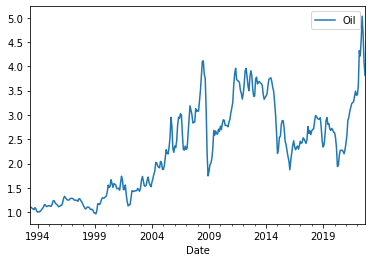

In [417]:
# Plot Oil prices $ per gallon in last 30 years
gasoline_prices.plot()

__2.__

Lets download the Bureau of Labor Statistics Consumer Price Index Dataset from the site
https://www.usinflationcalculator.com/inflation/consumer-price-index-and-annual-percent-changes-from-1913-to-2008/

Lets load the dataset. This dataset is a time series data.

In [418]:
cpi = pd.read_csv("https://raw.githubusercontent.com/CUNY-SPS-Data-Science-Program/set-up-rnivas2028/BrainStumpers/SeriesReport-20221003223734_12c428.csv",
                     skiprows = 1, on_bad_lines='skip')
cpi.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1993,0.4,0.2,0.1,0.3,0.3,0.1,0.1,0.2,0.1,0.4,0.3,0.2
1,1994,0.0,0.3,0.3,0.1,0.2,0.3,0.3,0.4,0.2,0.1,0.3,0.2
2,1995,0.3,0.3,0.2,0.4,0.2,0.2,0.1,0.2,0.1,0.3,0.1,0.1
3,1996,0.5,0.2,0.3,0.4,0.2,0.2,0.2,0.1,0.3,0.3,0.3,0.3
4,1997,0.2,0.2,0.1,0.1,0.0,0.2,0.1,0.2,0.2,0.2,0.1,0.1


In [419]:
# Reshape (melt) the data to a time series format for last 30 years
cpi=cpi.melt(id_vars= ['Year'], var_name ='Month')
cpi['Date']=pd.to_datetime(cpi.Year.astype(str) + '/' + cpi.Month.astype(str) + '/01')
del cpi['Year'] # these columns are not needed anymore
del cpi['Month']
cpi = cpi.rename(columns={'value': 'CPI'})

In [420]:
# create an index to plot CPI data as a time series dataset
cpi.sort_values(by=['Date'], inplace=True, ascending=False)
cpi=cpi.iloc[4:len(cpi)-3]
cpi=cpi.set_index('Date', inplace = False).sort_values(by='Date')
cpi.head()

,CPI
Date,
1993-04-01,0.3
1993-05-01,0.3
1993-06-01,0.1
1993-07-01,0.1
1993-08-01,0.2


<AxesSubplot:xlabel='Date'>

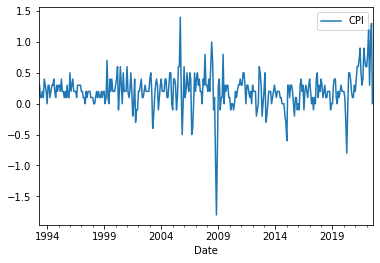

In [421]:
cpi.plot()

In [422]:
gasoline_prices_cpi=pd.merge(gasoline_prices,cpi,on='Date')
gasoline_prices_cpi.head()

,Oil,CPI
Date,,
1993-05-01,1.100,0.3
1993-06-01,1.097,0.1
1993-07-01,1.078,0.1
1993-08-01,1.062,0.2
1993-09-01,1.050,0.1


__3.a CPI vs Oil Prices__

Let try finding a orrelation between energy costs and inflation in last 30 years 

Text(0, 0.5, 'Consumer Price Index(CPI)')

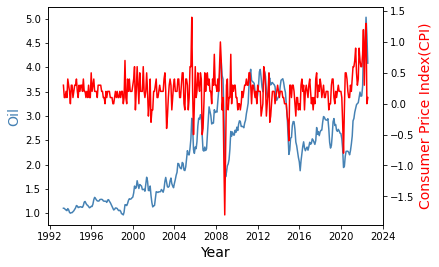

In [423]:
fig,ax = plt.subplots()
ax.plot(gasoline_prices_cpi.index,gasoline_prices_cpi.Oil, color='steelblue')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Oil', color='steelblue', fontsize=14)

ax2 = ax.twinx()

ax2.plot(gasoline_prices_cpi.index,gasoline_prices_cpi.CPI, color='red')
ax2.set_ylabel('Consumer Price Index(CPI)', color='red', fontsize=14)

In [424]:
hist(gasoline_prices_cpi.CPI,bin=100)

__3.b PPI vs Oil Prices__

Let try finding a orrelation between energy costs and PPI in last 30 years 

In [425]:
# Access PPI data and create index 
ppi = pd.read_csv("https://raw.githubusercontent.com/CUNY-SPS-Data-Science-Program/set-up-rnivas2028/BrainStumpers/PPIACO.csv",
                     skiprows = 0,parse_dates = ['DATE'])
ppi = ppi.rename(columns={'DATE': 'Date','PPIACO':'PPI' })
ppi=ppi.set_index('Date', inplace = False)
ppi=ppi.iloc[3:len(ppi)-1] # remove extra rows
ppi.head()

,PPI
Date,
1993-04-01,119.3
1993-05-01,119.7
1993-06-01,119.5
1993-07-01,119.2
1993-08-01,118.7


<AxesSubplot:xlabel='Date'>

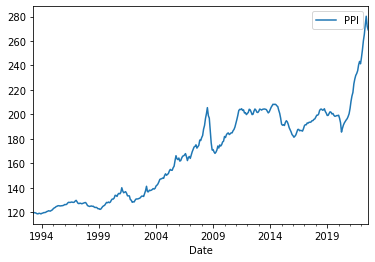

In [426]:
ppi.plot()

Text(0, 0.5, 'Producer Price Indexes(PPI)')

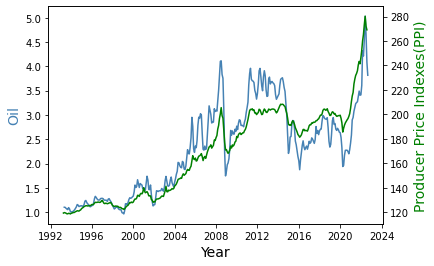

In [427]:
fig,ax = plt.subplots()
ax.plot(gasoline_prices.index,gasoline_prices.Oil, color='steelblue')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Oil', color='steelblue', fontsize=14)

ax2 = ax.twinx()

ax2.plot(ppi.index,ppi.PPI, color='green')
ax2.set_ylabel('Producer Price Indexes(PPI)', color='green', fontsize=14)

In [428]:
# Lets calculate corelation between Gasoline prices and CPI
selected_cpi_oil = pd.DataFrame(zip(gasoline_prices_cpi['Oil'],
                            gasoline_prices_cpi['CPI']),
                        columns=['Oil','CPI'])

In [429]:
selected_cpi_oil.corr()

,Oil,CPI
Oil,1.000000,0.156362
CPI,0.156362,1.000000


In [430]:
selected_ppi_oil = pd.DataFrame(zip(gasoline_prices_cpi['Oil'],
                            ppi['PPI']),
                        columns=['Oil','PPI'])

In [431]:
# Lets calculate corelation between Gasoline prices and PPI
selected_ppi_oil.corr()

,Oil,PPI
Oil,1.000000,0.913721
PPI,0.913721,1.000000


------------------------------------------------------
__3. Assessment of the causes for the changes__

__*Gasoline Prices vs CPI*__ 
- Positive factional value __(0.154722)__ shows a positive but marginal correlation. It’s no secret that fluctuations in oil prices can lead to dramatic swings in headline price inflation, as chart above shows.

- In contrast, the graph shows a positive but much weaker relationship between oil prices and CPI inflation. The correlation is __0.154__, much lower than for producer prices. This weaker link between oil prices and consumer prices likely comes from the relatively higher weight of services in the U.S. consumption basket, which we expect to rely less on oil as a production input.

- After all, not only does oil fuel the vast majority of transportation needs, it’s also a critical raw material used in consumer products far and wide, and much of the price swings in oil are passed on to consumers. With oil moving higher compared to year-ago prices, we should naturally expect a transitory boost to headline CPI as a result. 

CPI Categories by Weight as of August 2022

Group |Weight
-----|----- 
Housing	| 32.2%
Commodities	| 21.2%
Food | 13.5%
Energy | 8.8%
Education | 7.6%
Health Care	| 6.8%
Transportation	| 5.9%
Other Expenses	| 4.0%
Total Expenses	| 100%

Since the CPI is most directly influenced by oil price changes through its energy component, one question that remains is whether or not other components in the CPI are influenced by low oil prices. Generally, energy prices are rather volatile, and so energy components are often excluded when predicting inflation because of that volatility.


__*Gasoline Prices vs PPI*__ : 
- The graph shows a strong positive relationship between oil prices and PPI inflation. That is, higher oil prices are associated with higher producer prices and vice versa. 
- Specifically, the correlation between oil prices and the PPI is __0.91__. This strong link likely comes from the importance of oil as an input in the production of goods. In contrast, the graph shows a positive but much weaker relationship between oil prices and CPI inflation. The correlation is __0.15__, much lower than for producer prices. 
- This weaker link between oil prices and consumer prices likely comes from the relatively higher weight of services in the U.S. consumption basket, which you’d expect to rely less on oil as a production input.
- The year-over-year percent change in the PPI for finished goods has been loosely related to international oil prices for the past 20 years. But when oil reached USD60 a barrel in 2007, the two price series began to move more in sync. 
- The year-over-year percent change in the PPI was lower in the most recent data release, but it is still too early to tell whether low oil prices are going to feed through to the PPI going forward.